In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

In [2]:
housing = pd.read_csv("./Dataset/merged_files.csv")
housing

,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,Bangalore,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,Bangalore,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,Bangalore,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,Bangalore,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,14500000,1180,Mira Road East,Mumbai,2,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32959,14500000,530,Naigaon East,Mumbai,1,1,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32960,4100000,700,Shirgaon,Mumbai,1,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32961,2750000,995,Mira Road East,Mumbai,2,0,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [3]:
# Specify the specific value to drop rows containing
specific_value = 9

# Drop rows with the specific value
#housing_filtered = housing[~(housing['City'] == specific_value)]

housing_filtered = housing[~(housing == specific_value).any(axis=1)]
housing_filtered = housing_filtered.drop_duplicates()
print(housing_filtered.shape)
housing_filtered.head(15)

(8226, 41)


,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,Bangalore,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,Bangalore,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,Bangalore,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,Bangalore,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
5,6797000,1220,Horamavu,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
6,20000000,2502,Thanisandra,Bangalore,4,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
7,7105000,1438,Ramamurthy Nagar,Bangalore,3,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
8,8405000,1405,Whitefield Hope Farm Junction,Bangalore,3,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
9,3506000,660,Electronic City Phase 1,Bangalore,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


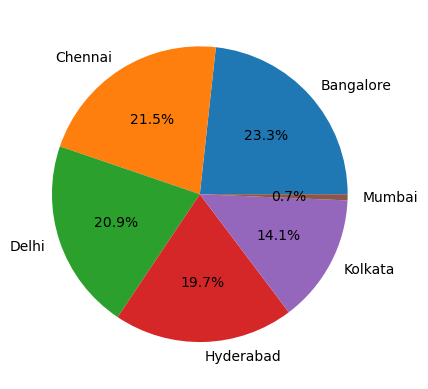

In [17]:
data = housing_filtered['City'].value_counts().tolist()
labels = housing_filtered['City'].unique().tolist()

# Create the pie chart
plt.pie(data, labels=labels,autopct='%1.1f%%')
plt.show()

Is there any correlation between the area of the property and its price? Visualize the relationship

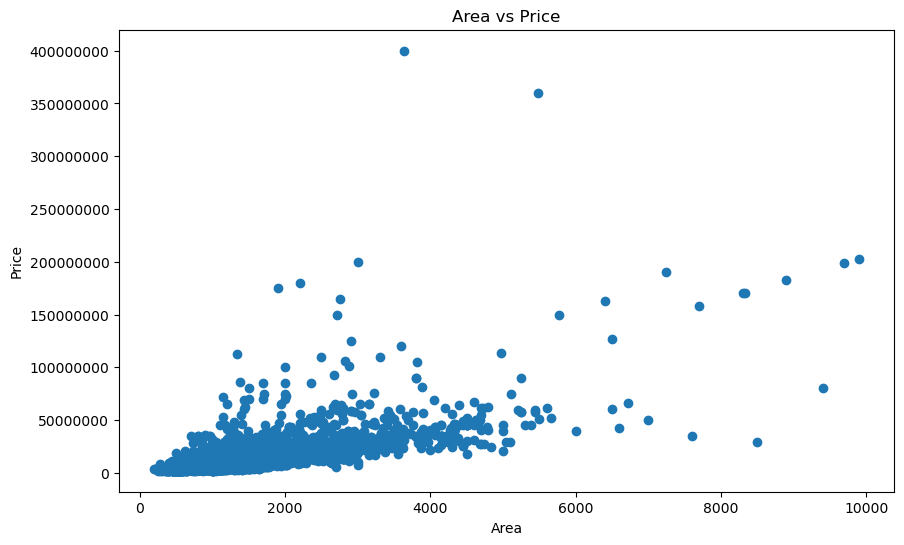

In [21]:
price = housing_filtered['Price']
area = housing_filtered['Area']
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(area, price)
plt.title("Area vs Price")
plt.ticklabel_format(style='plain', axis='y', scilimits=(5,3))
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

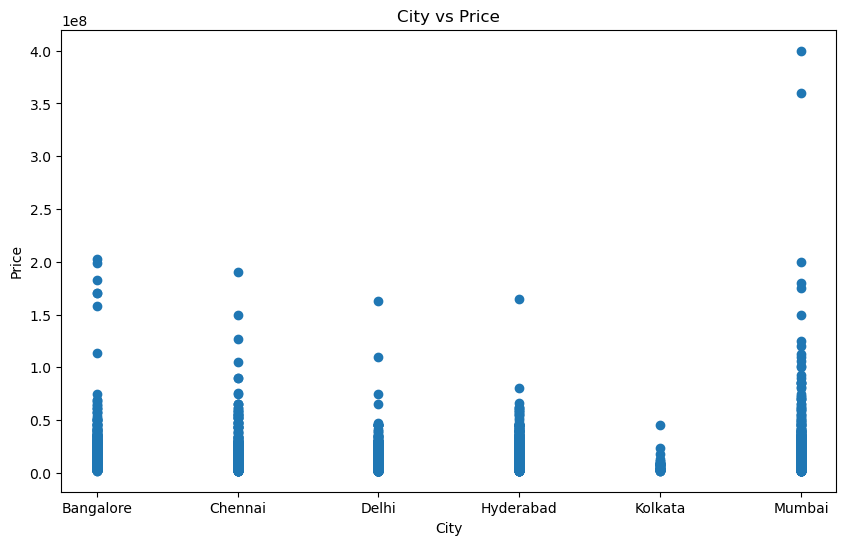

In [5]:
price = housing_filtered['Price']
city = housing_filtered['City']
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(city, price)
plt.title("City vs Price")
plt.xlabel("City")
plt.ylabel("Price")
plt.show()

Are properties with a swimming pool generally more expensive than those without? Create a visualization to compare the prices.

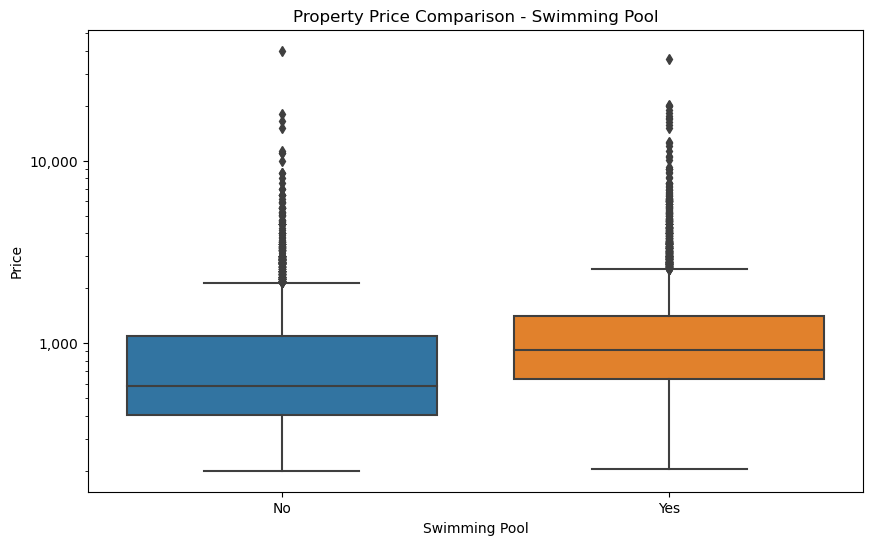

In [6]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SwimmingPool', y='Price', data=housing_filtered)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1e4):,}'))
plt.title("Property Price Comparison - Swimming Pool")
plt.xlabel("Swimming Pool")
plt.ylabel("Price")
plt.xticks([0, 1], ['No', 'Yes'])  # Customize x-axis labels
plt.show()

Create a stacked bar chart to show the availability of different amenities (such as lift, vaastu compliant, microwave, etc.) for properties in different locations.

In [7]:
amenities = ['LiftAvailable', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']
grouped_data = housing_filtered.groupby('City')[amenities].sum()

<Figure size 1200x600 with 0 Axes>

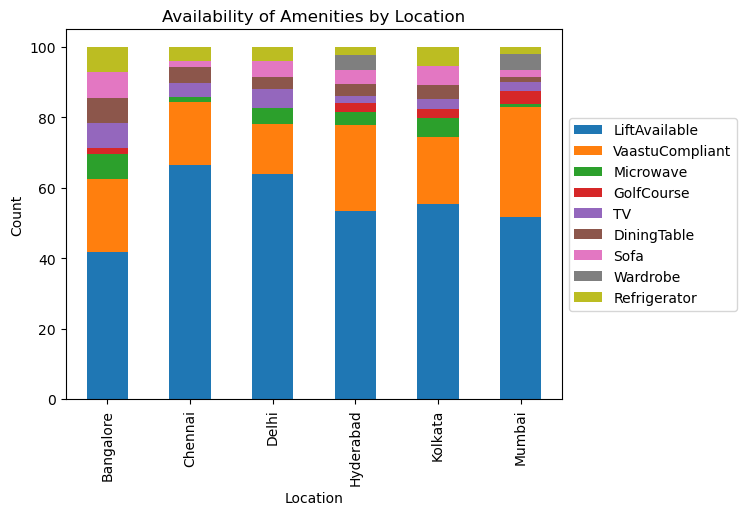

In [12]:
plt.figure(figsize=(12, 6))
normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
normalized_data.plot(kind='bar', stacked=True)
plt.title("Availability of Amenities by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#Har city me kitne area ka residential area hai vo bhi check kar skte